#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

#### Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\divya\Downloads\pizza_sales\pizza_sales.csv")

In [3]:
# Get the number of rows and columns in the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Display the first 5 rows
df.head()

Rows: 48620, Columns: 12


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
df.columns    # getting the names of the columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [6]:
df.isnull().sum()*100/len(df)    #checking for null values

pizza_id             0.0
order_id             0.0
pizza_name_id        0.0
quantity             0.0
order_date           0.0
order_time           0.0
unit_price           0.0
total_price          0.0
pizza_size           0.0
pizza_category       0.0
pizza_ingredients    0.0
pizza_name           0.0
dtype: float64

In [7]:
# Display summary statistics of the dataset rounded to 2 decimals
round(df.describe(), 2)

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.00,48620.00,48620.00,48620.00,48620.00
mean,24310.50,10701.48,1.02,16.49,16.82
std,14035.53,6180.12,0.14,3.62,4.44
min,1.00,1.00,1.00,9.75,9.75
25%,12155.75,5337.00,1.00,12.75,12.75
50%,24310.50,10682.50,1.00,16.50,16.50
75%,36465.25,16100.00,1.00,20.25,20.50
max,48620.00,21350.00,4.00,35.95,83.00


In [8]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

#### Feature Engineering

In [9]:
# Convert order_date to datetime and extract weekday names
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()

# Keep weekdays in correct order for grouping/plotting
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday, ordered=True)

# Count unique orders per day
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

In [10]:
# Convert order_time to datetime format
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

# Extract the hour from order_time
df['order_hour'] = df['order_time'].dt.hour

In [11]:
# Create 'part_of_day' based on order hour
def get_part_of_day(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 21:
        return 'Evening'
    else:
        return 'Late Night'

# Apply function to create new column
df['part_of_day'] = df['order_hour'].apply(get_part_of_day)

In [12]:
# Convert order_date to datetime and extract month name
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['month_name'] = df['order_date'].dt.month_name()

# Keep months in correct calendar order
month = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = pd.Categorical(df['month_name'], categories=month, ordered=True)

In [13]:
# Mark weekends: 1 for Saturday/Sunday, 0 for weekdays
df['is_weekend'] = df['order_date'].dt.dayofweek.isin([5, 6]).astype(int)

In [14]:
# Count number of ingredients in each pizza
df['ingredient_count'] = df['pizza_ingredients'].apply(lambda x: x.count(',') + 1)

In [15]:
# Flag vegetarian pizzas: 1 for Veggie, 0 for others
df['is_veg'] = df['pizza_category'].apply(lambda x: 1 if x == 'Veggie' else 0)

In [16]:
# Count how many pizzas were included in each order
df['combo_order'] = df.groupby('order_id')['pizza_id'].transform('count')

## KPIs

In [17]:
# Calculate key business metrics
total_revenue = df['total_price'].sum()
total_orders = len(df['order_id'].unique())
total_pizzas_sold = df['quantity'].sum()
avg_combo = df['combo_order'].mean()
veg_count = df['is_veg'].sum()
non_veg_count = len(df) - veg_count
average_order_value = total_revenue / total_orders
average_pizza_per_order = total_pizzas_sold / total_orders

# Display summary results
print(f"Total Revenue : ${total_revenue:,.2f}")
print(f"Total Orders : {total_orders:,}")
print(f"Total Pizzas Sold : {total_pizzas_sold:,}")
print(f"Average Combo : {avg_combo:,.2f}")
print(f"Veg Count : {veg_count:,}")
print(f"Non-Veg Count : {non_veg_count:,}")
print(f"Average Order Value : ${average_order_value:,.2f}")
print(f"Average Pizza Per Order : {average_pizza_per_order:,.2f}")

Total Revenue : $817,860.05
Total Orders : 21,350
Total Pizzas Sold : 49,574
Average Combo : 3.55
Veg Count : 11,449
Non-Veg Count : 37,171
Average Order Value : $38.31
Average Pizza Per Order : 2.32


## EDA

#### Ingredient Analysis

                   count
pizza_ingredients       
Garlic             27422
Tomatoes           26601
Red Onions         19547
Red Peppers        16284
Mozzarella Cheese  10333
Pepperoni          10300
Spinach            10012
Mushrooms           9624
Chicken             8443
Capocollo           6572


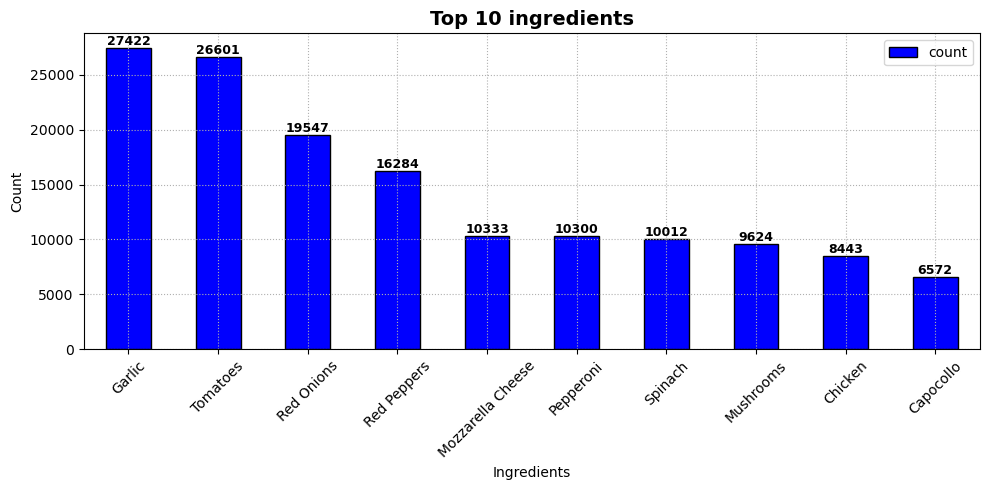

                   count
pizza_ingredients       
Garlic             27422
Tomatoes           26601
Red Onions         19547
Red Peppers        16284
Mozzarella Cheese  10333
Pepperoni          10300
Spinach            10012
Mushrooms           9624
Chicken             8443
Capocollo           6572


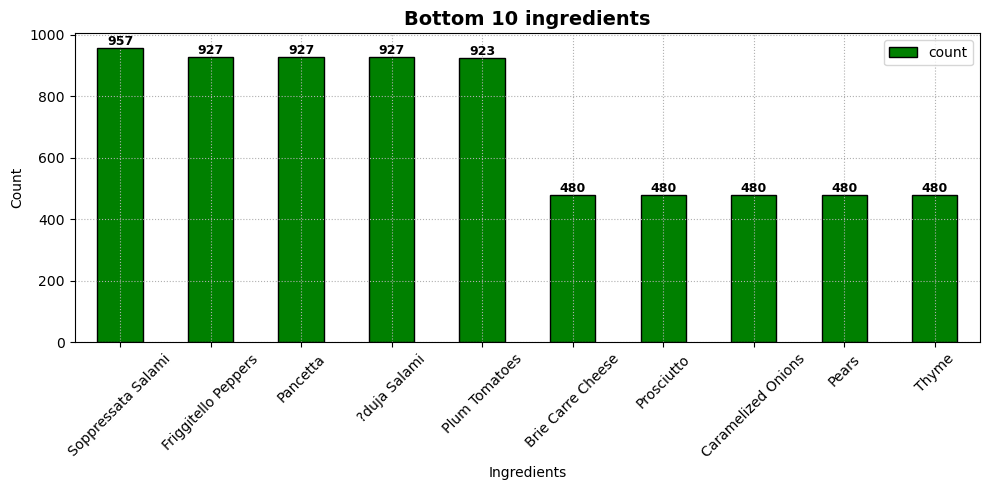

In [18]:
# Count how often each ingredient appears
ingredients = (
    df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .rename_axis('pizza_ingredients')   # make ingredient names the index
    .reset_index(name='count')          # keep count as a column
    .set_index('pizza_ingredients')     # set pizza_ingredients as index
)

print(ingredients.head(10))

top_ingredients = ingredients.head(10)

ax = top_ingredients.plot(kind='bar', figsize=(10, 5), color='blue', edgecolor='black')

# Add titles, grid and labels
ax.set_title('Top 10 ingredients', fontsize=14, fontweight='bold')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle = ':')

# Display values on top of bars
ax.bar_label(ax.containers[0], fmt='%d', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


print(ingredients.head(10))

bottom_ingredients = ingredients.tail(10)

ax = bottom_ingredients.plot(kind='bar', figsize=(10, 5), color='green', edgecolor='black')

# Add titles, grid and labels
ax.set_title('Bottom 10 ingredients', fontsize=14, fontweight='bold')
ax.set_xlabel('Ingredients')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle = ':')

# Display values on top of bars
ax.bar_label(ax.containers[0], fmt='%d', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

##### Top 10 Ingredients  
- **Garlic** and **Tomatoes** are the most commonly used ingredients, showing their dominance in pizza recipes.  
- **Mozzarella Cheese**, **Pepperoni**, and **Spinach** follow closely, indicating a balanced mix of veg and non-veg preferences.
##### Bottom 10 Ingredients  
- Ingredients like **Thyme**, **Pears**, and **Brie Carre Cheese** are the least used, showing they are rare or specialty toppings.  
- These ingredients might be limited to premium or gourmet pizzas with lower demand.

#### Hourly Trend - Total Orders

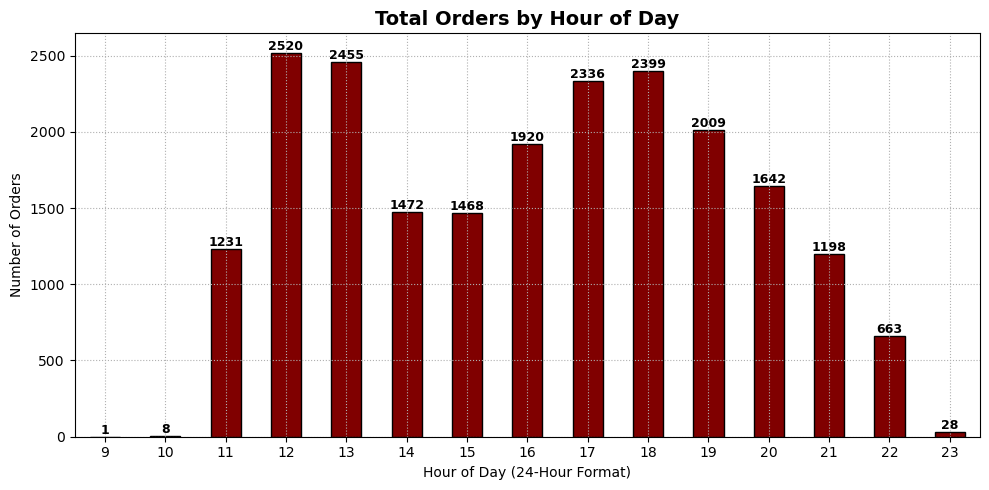

In [34]:
# Group and count unique orders by hour
orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()

# Plot total orders by hour of the day
ax = orders_by_hour.plot(kind='bar', figsize=(10, 5), color='maroon', edgecolor='black')

# Add titles, grid and labels
ax.set_title('Total Orders by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day (24-Hour Format)')
ax.set_ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.grid(True, linestyle = ':')

# Display values on top of bars
ax.bar_label(ax.containers[0], fmt='%d', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# this chart shows which hour of the day have the highest number of orders

- Most orders are placed around **12 PM to 1 PM** and again between **5 PM to 7 PM**, indicating peak lunch and dinner hours.  
- Order volume drops significantly after **9 PM**, showing reduced customer activity late at night.

### Hourly Trend - Total Revenue

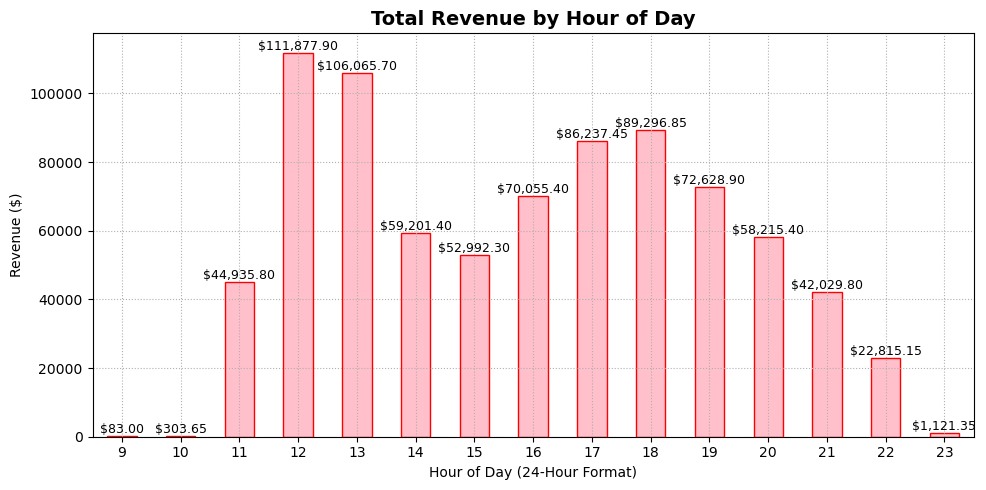

In [20]:
# Calculate total revenue by hour of the day
revenue_by_hour = df.groupby('order_hour', observed=False)['total_price'].sum()

# Plot total revenue by hour
ax = revenue_by_hour.plot(kind='bar', figsize=(10, 5), color='pink', edgecolor='red')

# Add titles, labels, and grid
ax.set_title('Total Revenue by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day (24-Hour Format)')
ax.set_ylabel('Revenue ($)')
plt.xticks(rotation=0)
plt.grid(True, linestyle=':')

# Show revenue values on top of bars
ax.bar_label(ax.containers[0], fmt='${:,.2f}'.format, fontsize=9, fontweight='medium')

plt.tight_layout()
plt.show()

# This chart helps identify peak revenue hours, useful for staffing and promotions.

- The highest revenue is generated around **12 PM to 1 PM**, followed by another strong period between **5 PM to 7 PM**, matching lunch and dinner peaks.  
- Revenue drops sharply after **9 PM**, showing limited late-night sales activity.

### Daily Trend - Number of orders

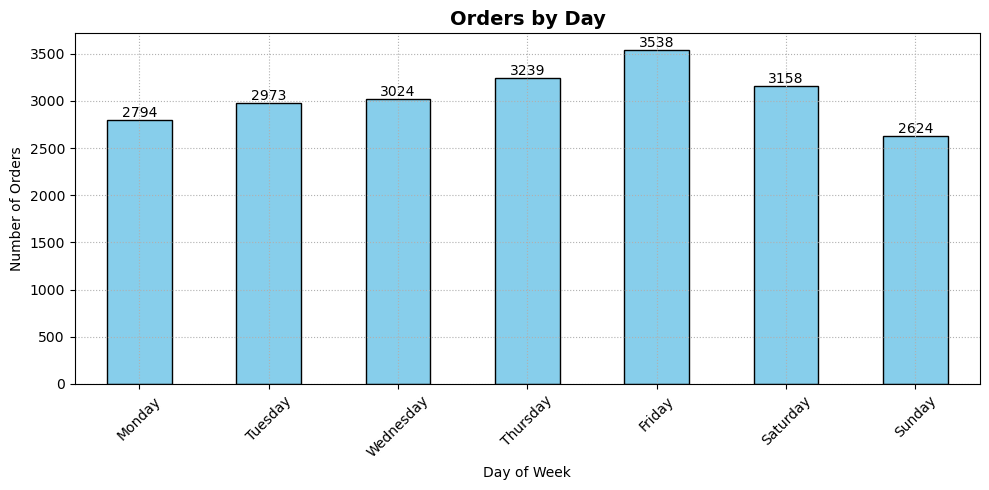

In [36]:
# Count unique orders by day of the week
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()

# Plot orders by day
ax = orders_by_day.plot(kind='bar', color='skyblue', figsize=(10, 5), edgecolor='black')

# Add value labels on top of bars
ax.bar_label(ax.containers[0])

# Titles, axis labels, and formatting
plt.title('Orders by Day', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# This chart shows which weekdays have the highest number of orders.

- The highest number of orders occurs on **Friday**, indicating strong end-of-week demand.  
- **Sunday** has the fewest orders, suggesting reduced customer activity at the end of the weekend.

### Daily Trend - Total Revenue

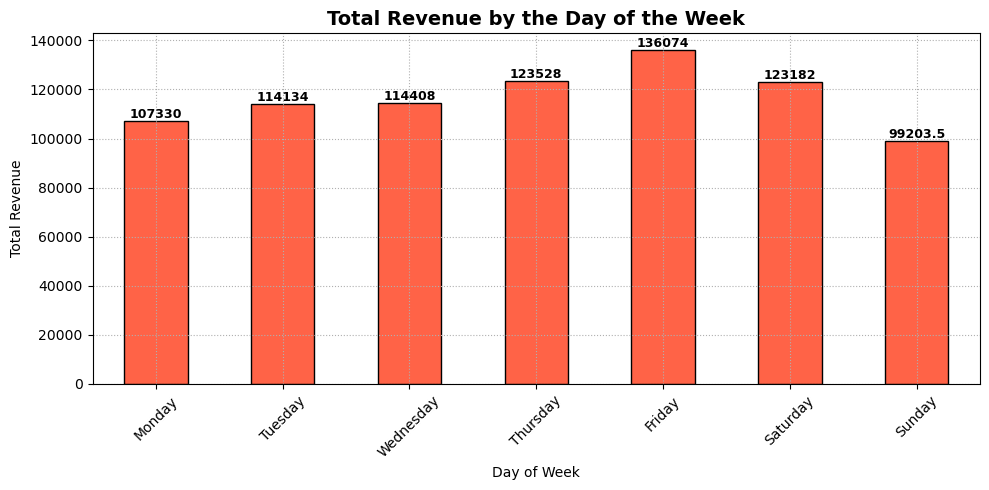

In [22]:
# Calculate total revenue by day of the week
revenue_by_day = df.groupby('day_name', observed=False)['total_price'].sum()

# Plot revenue by day
ax = revenue_by_day.plot(kind='bar', color='tomato', figsize=(10, 5), edgecolor='black')

# Add value labels on top of bars
ax.bar_label(ax.containers[0], fontsize=9, fontweight='bold')

# Titles, axis labels, and formatting
plt.title('Total Revenue by the Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# This chart helps identify which weekdays generate the most revenue.

- **Friday** records the highest total revenue, indicating strong end-of-week sales performance.  
- **Sunday** shows the lowest revenue, suggesting weaker customer spending on that day.

### Monthly Trends- Total Orders

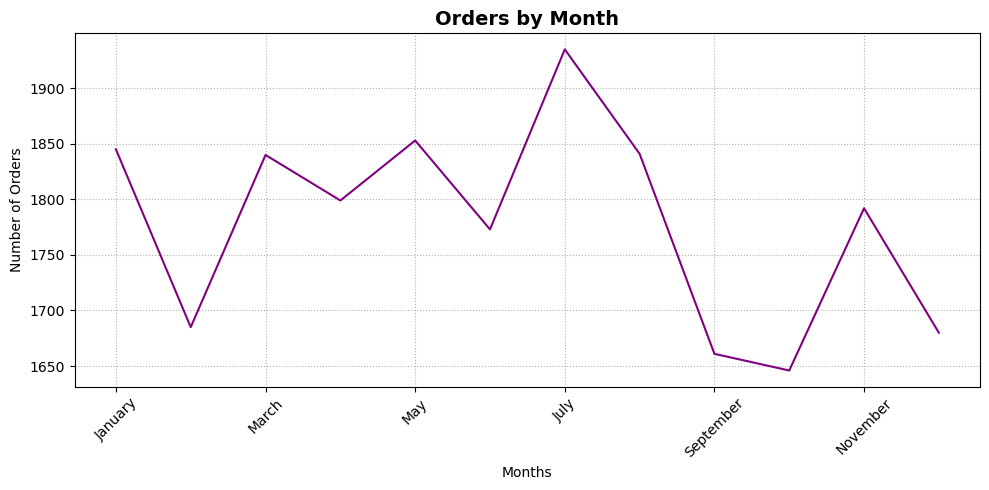

In [38]:
# Count unique orders by month
orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()

# Plot orders by month as a line chart
ax = orders_by_month.plot(kind='line', color='purple', figsize=(10, 5))

# Titles and formatting
plt.title('Orders by Month', fontsize=14, fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

# This chart shows monthly trends in order volume throughout the year.

- The highest number of orders occurs in **July**, showing a mid-year peak in customer activity.  
- Orders decline around **September**, indicating a slowdown during that period.

### % of sales by pizza category 

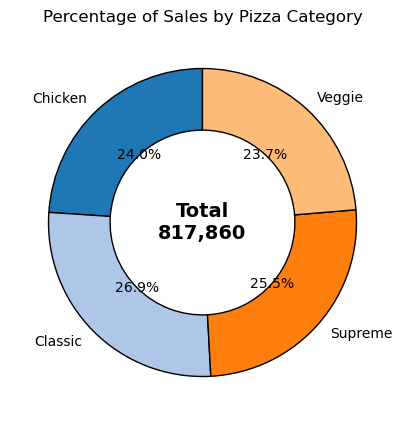

In [24]:
# Sum total revenue by pizza category
category_sales = df.groupby('pizza_category')['total_price'].sum()

# Pie chart to show revenue share by category
plt.figure(figsize=(5,5))
colors = plt.get_cmap('tab20').colors  # color palette

plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',        # show percentages
    startangle=90,            # start at top
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'width': 0.4}  # donut style
)

# Display total revenue at center
total = category_sales.sum()
plt.text(0, 0, f'Total\n{total:,.0f}', ha='center', va='center', fontsize=14, fontweight='bold')

plt.title("Percentage of Sales by Pizza Category")
plt.show()

# This chart visualizes which pizza categories contribute most to revenue.

- **Classic pizzas** contribute the highest share of sales at **26.9%**, followed closely by **Supreme (25.5%)**.  
- **Veggie pizzas** have the smallest share at **23.7%**, though all categories show fairly balanced sales distribution.

### % sales by pizza size and category

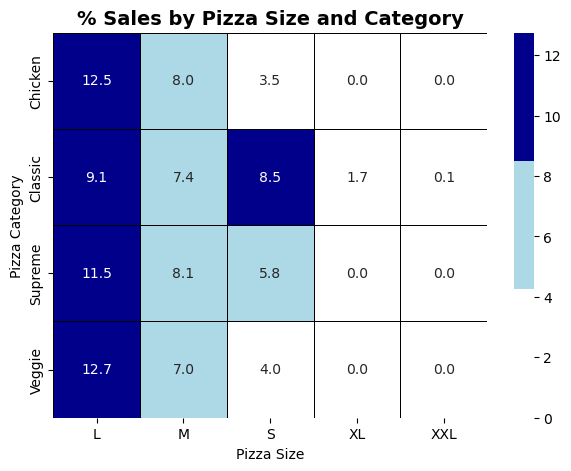

In [40]:
# Create pivot table of total revenue by pizza category and size
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

# Convert to percentage of total sales
sales_percentage = (sales_pivot * 100) / sales_pivot.sum().sum()

# Plot heatmap to visualize % sales by size and category
plt.figure(figsize=(7,5))
sns.heatmap(
    sales_percentage, 
    annot=True, 
    fmt=".1f", 
    linewidths=0.5, 
    linecolor='black', 
    cmap=sns.color_palette(["#ffffff", "#add8e6", "#00008b"])
)
plt.title('% Sales by Pizza Size and Category', fontsize=14, fontweight='bold')
plt.xlabel('Pizza Size')
plt.ylabel('Pizza Category')
plt.show()

# This heatmap shows which pizza sizes and categories contribute most to overall revenue.

- **Large (L)** pizzas contribute the highest sales percentage across all categories, especially for **Veggie** and **Chicken** pizzas.  
- **XL** and **XXL** sizes have minimal or no sales, showing a clear customer preference for smaller and mid-sized pizzas.

### Total pizzas sold by pizza category

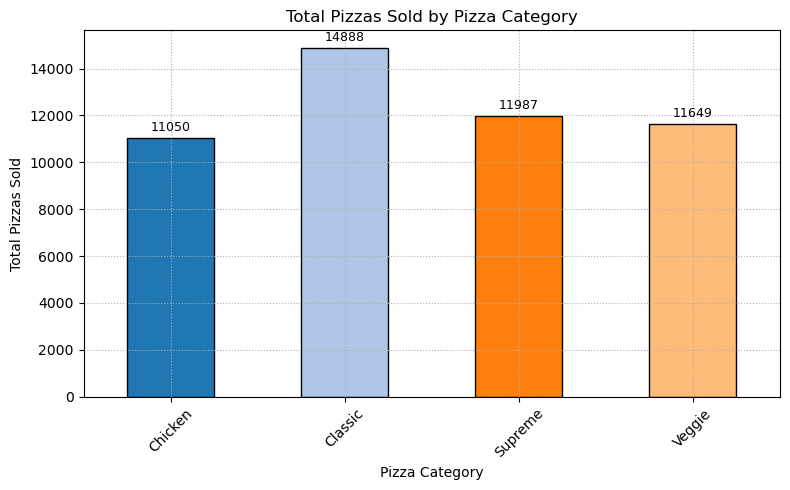

In [26]:
# Sum total pizzas sold by category
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

# Use a color palette matching the number of categories
colors = list(plt.get_cmap('tab20').colors)[:len(pizzas_by_category)]

# Plot total pizzas sold by category
ax = pizzas_by_category.plot(
    kind='bar',
    figsize=(8, 5),
    color=colors,
    edgecolor='black'
)

# Titles and labels
plt.title("Total Pizzas Sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Pizzas Sold")
plt.xticks(rotation=45)
plt.grid(True, linestyle=':')

# Add value labels on top of bars
ax.bar_label(ax.containers[0], label_type='edge', fontsize=9, fontweight='medium', padding=3)

plt.tight_layout()
plt.show()

# This chart shows which pizza categories are the most popular in terms of quantity sold.

- **Classic pizzas** lead with **14,888 units sold**, showing the highest customer preference among all categories.  
- **Chicken pizzas** have the lowest sales at **11,050 units**, while **Supreme** and **Veggie** categories maintain steady mid-range demand.

### Revenue by Part of Day & Weekday

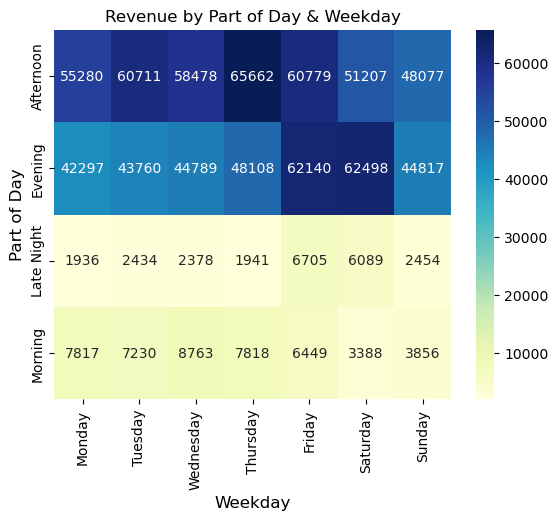

In [27]:
# Create pivot table of total revenue by part of day and weekday
heatmap_data = df.pivot_table(
    index='part_of_day',
    columns='day_name',
    values='total_price',
    aggfunc='sum',
    observed=False
)

# Plot heatmap to visualize revenue patterns
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue by Part of Day & Weekday")
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Part of Day", fontsize=12)

plt.show()

# This heatmap highlights which parts of the day and weekdays generate the most revenue.

- **Afternoons** generate the highest revenue overall, with **Thursday ($65,662)** being the peak day.  
- **Evenings on Friday and Saturday** also show strong sales, while **mornings and late nights** contribute the least revenue across all weekdays.

### Top 5 pizzas by revenue

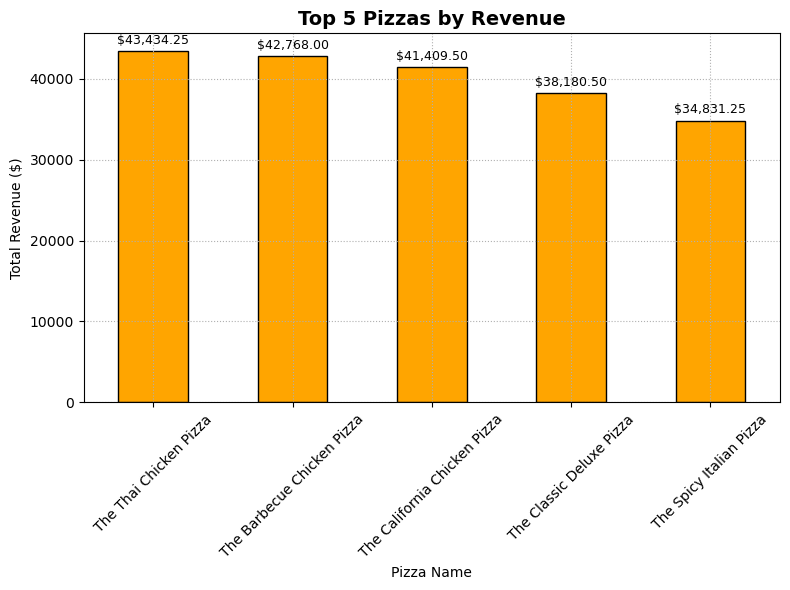

In [28]:
# Top 5 pizzas by revenue
top_pizzas = df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head(5)

# Plot bar chart
ax = top_pizzas.plot(kind='bar', color='orange', edgecolor='black', figsize=(8,6))

# Titles and labels
plt.title("Top 5 Pizzas by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True, linestyle=':')

# Add value labels on top of bars
ax.bar_label(ax.containers[0], fmt='${:,.2f}'.format, fontsize=9, fontweight='medium', padding=3)

plt.tight_layout()
plt.show()

# This chart shows the top 5 revenue-generating pizzas in the dataset.

- **The Thai Chicken Pizza** generated the highest revenue at **$43,434.25**, followed closely by **The Barbecue Chicken Pizza** and **The California Chicken Pizza**.  
- Overall, **chicken-based pizzas** dominate the top 5 list, indicating strong customer preference for chicken varieties.

### Plot proportion of Veg vs Non-Veg pizzas

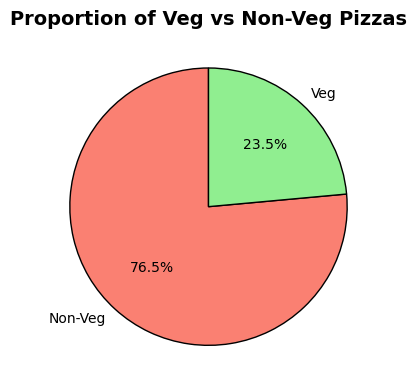

In [29]:
plt.figure(figsize=(4,4))
df['is_veg'].value_counts().plot(
    kind='pie',
    labels=['Non-Veg','Veg'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['salmon', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Proportion of Veg vs Non-Veg Pizzas", fontsize=14, fontweight='bold')
plt.ylabel('')  # remove default y-label
plt.tight_layout()
plt.show()

# This pie chart shows the percentage split between vegetarian and non-vegetarian pizzas.

- **Non-Veg pizzas** make up the majority of sales at **76.5%**, showing a clear preference among customers.  
- **Veg pizzas** account for only **23.5%**, indicating a smaller but notable vegetarian demand.

### Scatter plot: Ingredient count vs Total price, colored by Veg/Non-Veg

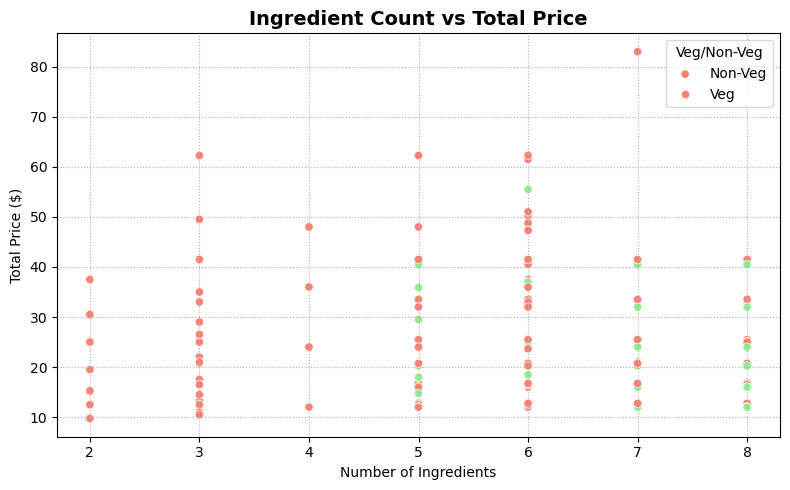

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='ingredient_count', y='total_price', hue='is_veg', palette=['salmon', 'lightgreen'])

# Titles and labels
plt.title("Ingredient Count vs Total Price", fontsize=14, fontweight='bold')
plt.xlabel("Number of Ingredients")
plt.ylabel("Total Price ($)")
plt.legend(title='Veg/Non-Veg', labels=['Non-Veg', 'Veg'])
plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

# This scatter plot helps visualize how pizza price varies with ingredient count and type.

- There’s a **positive relationship** between the number of ingredients and total price — pizzas with more ingredients tend to cost more.  
- **Non-Veg pizzas (red)** generally have higher prices than **Veg pizzas (green)** for the same ingredient count.  
- Most pizzas cluster between **3–6 ingredients**, indicating these are the most common combinations offered.

### Histogram of number of pizzas per order (combo size)

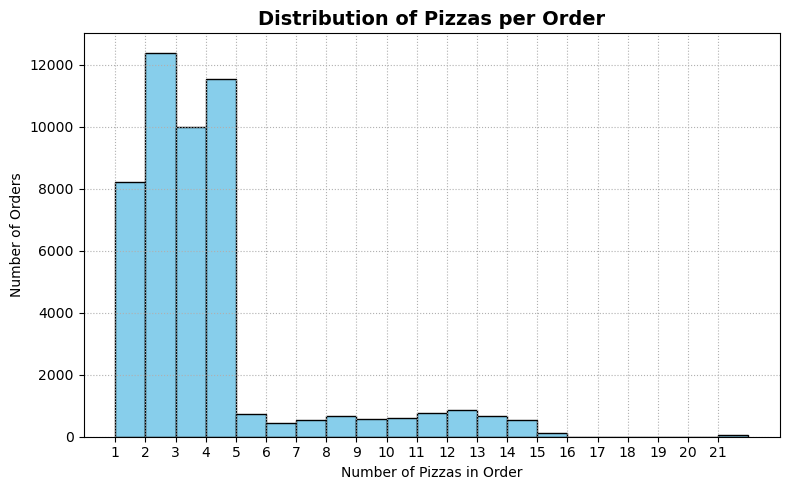

In [31]:
plt.figure(figsize=(8,5))
df['combo_order'].hist(bins=range(1, df['combo_order'].max()+2), color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Pizzas per Order", fontsize=14, fontweight='bold')
plt.xlabel("Number of Pizzas in Order")
plt.ylabel("Number of Orders")
plt.xticks(range(1, df['combo_order'].max()+1))
plt.grid(True, linestyle=':')

plt.tight_layout()
plt.show()

# This histogram shows how many orders contain 1, 2, 3, etc. pizzas.

- Most orders consist of **2 to 4 pizzas**, showing that customers usually prefer small or medium-sized orders.  
- **Single or very large orders (5+ pizzas)** are much less frequent, meaning bulk or party orders are uncommon.  
- This suggests a **steady individual or small group customer base** rather than large catering-type orders.

### Total revenue by combo size, split by Veg/Non-Veg

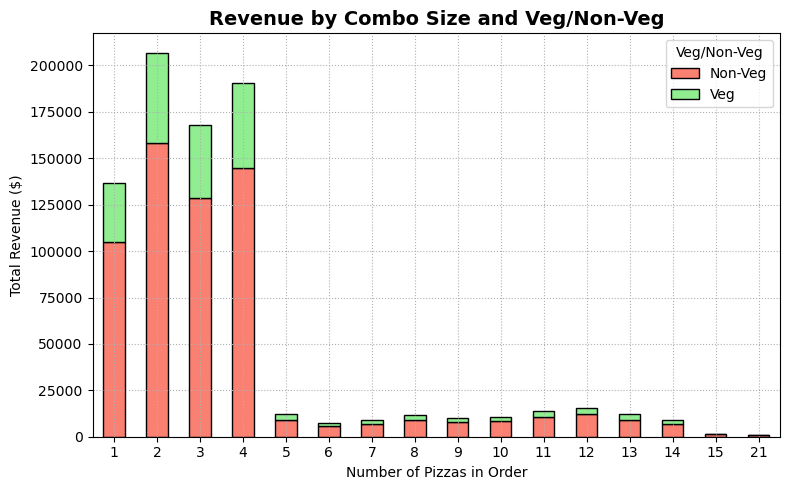

In [32]:
combo_veg = df.groupby(['combo_order', 'is_veg'])['total_price'].sum().unstack()

# Plot stacked bar chart
ax = combo_veg.plot(kind='bar', stacked=True, figsize=(8,5), color=['salmon', 'lightgreen'], edgecolor='black')

# Titles and labels
plt.title("Revenue by Combo Size and Veg/Non-Veg", fontsize=14, fontweight='bold')
plt.xlabel("Number of Pizzas in Order")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=0)
plt.grid(True, linestyle=':')

plt.legend(title='Veg/Non-Veg', labels=['Non-Veg','Veg'])
plt.tight_layout()
plt.show()

# This chart shows how revenue varies by combo size and pizza type.

- **Orders with 2–4 pizzas** generate the **highest revenue**, showing these are the most profitable combo sizes.  
- **Non-Veg pizzas dominate revenue**, indicating stronger demand compared to Veg options.  
- **Large combos (5+ pizzas)** contribute very little, suggesting **bulk orders are rare and less profitable**.

# Final Summary — Pizza Sales Analysis  

- The project analyzed **pizza sales data** to uncover customer behavior and revenue trends.  
- Extensive **data cleaning** was done — fixing data types, removing duplicates, and handling missing values.  
- Most orders contained **2–4 pizzas**, indicating typical purchases by individuals or small groups.  
- **Garlic, Tomatoes, and Red Onions** were the most used ingredients, forming the base of many pizzas.  
- **Thyme, Pears, and Prosciutto** appeared the least, showing limited or premium usage.  
- **Non-Veg pizzas** generated the **highest revenue share**, reflecting stronger customer demand.  
- **Medium-sized combos (2–4 pizzas)** were the most profitable and popular among customers.  
- Ingredient data can guide better **inventory planning and menu optimization**.  
- Revenue and order trends support improving **marketing strategies and product focus**.  
- The project effectively uses **Python, Pandas, Seaborn and Matplotlib** for insightful data visualization and analysis.

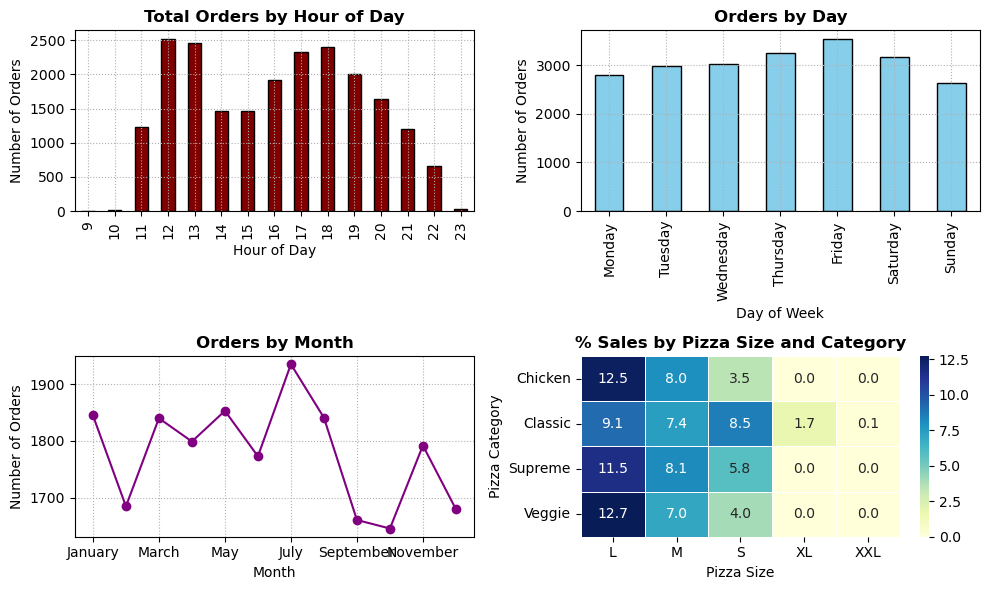

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10,6))

# 1️⃣ Total Orders by Hour of Day
orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()
orders_by_hour.plot(kind='bar', color='maroon', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Total Orders by Hour of Day', fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Number of Orders')
axes[0, 0].grid(True, linestyle=':')

# 2️⃣ Orders by Day of Week
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()
orders_by_day.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Orders by Day', fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].grid(True, linestyle=':')

# 3️⃣ Orders by Month
orders_by_month = df.groupby('month_name', observed=False)['order_id'].nunique()
orders_by_month.plot(kind='line', color='purple', marker='o', ax=axes[1, 0])
axes[1, 0].set_title('Orders by Month', fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Orders')
axes[1, 0].grid(True, linestyle=':')

# 4️⃣ % Sales by Pizza Size and Category (Heatmap)
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)
sales_percentage = (sales_pivot * 100) / sales_pivot.sum().sum()
sns.heatmap(
    sales_percentage,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu',
    linewidths=0.5,
    ax=axes[1, 1]
)
axes[1, 1].set_title('% Sales by Pizza Size and Category', fontweight='bold')
axes[1, 1].set_xlabel('Pizza Size')
axes[1, 1].set_ylabel('Pizza Category')

# Adjust layout
plt.tight_layout()
plt.show()


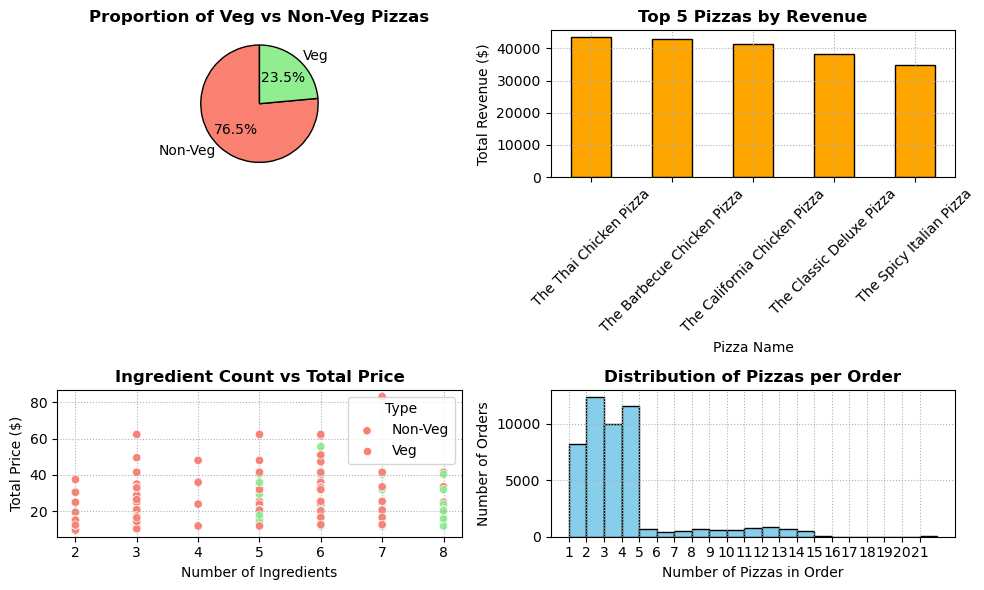

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# 1️⃣ Pie chart: Veg vs Non-Veg
df['is_veg'].value_counts().plot(
    kind='pie',
    labels=['Non-Veg', 'Veg'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['salmon', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'},
    ax=axes[0, 0]
)
axes[0, 0].set_title("Proportion of Veg vs Non-Veg Pizzas", fontweight='bold')
axes[0, 0].set_ylabel('')

# 2️⃣ Top 5 Pizzas by Revenue
top_pizzas = df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head(5)
top_pizzas.plot(kind='bar', color='orange', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title("Top 5 Pizzas by Revenue", fontweight='bold')
axes[0, 1].set_xlabel("Pizza Name")
axes[0, 1].set_ylabel("Total Revenue ($)")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, linestyle=':')

# 3️⃣ Scatter: Ingredient Count vs Total Price
sns.scatterplot(
    data=df,
    x='ingredient_count',
    y='total_price',
    hue='is_veg',
    palette=['salmon', 'lightgreen'],
    ax=axes[1, 0]
)
axes[1, 0].set_title("Ingredient Count vs Total Price", fontweight='bold')
axes[1, 0].set_xlabel("Number of Ingredients")
axes[1, 0].set_ylabel("Total Price ($)")
axes[1, 0].grid(True, linestyle=':')
axes[1, 0].legend(title='Type', labels=['Non-Veg', 'Veg'])

# 4️⃣ Histogram: Pizzas per Order
axes[1, 1].hist(
    df['combo_order'],
    bins=range(1, df['combo_order'].max()+2),
    color='skyblue',
    edgecolor='black'
)
axes[1, 1].set_title("Distribution of Pizzas per Order", fontweight='bold')
axes[1, 1].set_xlabel("Number of Pizzas in Order")
axes[1, 1].set_ylabel("Number of Orders")
axes[1, 1].set_xticks(range(1, df['combo_order'].max()+1))
axes[1, 1].grid(True, linestyle=':')

# Adjust spacing
plt.tight_layout()
plt.show()
